# Ordinary Least Squares (OLS) and knn regression 

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In this notebook we will do "Ordinary Least Squares"-regression on the BMI dataset. In the end, we compare the model to a knn regressor.


We will try to predict the values in the "Index" column based on the Height and Weight features. For simplicity we do not include the Gender column in our features. 

In [13]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


We pull out the features and the labels (i.e. the thing we are trying to predict):

In [14]:
X = data.loc[:,'Height':'Weight']
y = data['Index']

In [15]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [16]:
ODS = LinearRegression()
ODS.fit(X_train, y_train)

LinearRegression()

Let's find the $R^2$ performance on train and test data:

In [17]:
print("R^2 on train data is {} and on test data is {}".format(ODS.score(X_train, y_train), 
                                                              ODS.score(X_test,y_test)))

R^2 on train data is 0.8204968186497161 and on test data is 0.8283576006408596


We can also get the coefficients and the intercept for the model, where: 

$y = \text{intercept} + \text{coef}[0] \cdot \text{height} + \text{coef}[1]\cdot \text{weight}$.

In [18]:
print("The coefficents are {} and the intercept is {}".format(ODS.coef_, ODS.intercept_))

The coefficents are [-0.03637337  0.03406833] and the intercept is 6.356092835052848


And we can use the model to predict an index given a height and a weight:

In [19]:
h = 174
w = 64
print("A person with a height of {}cm and a weight of {}kg is predicted by the model \
to have an index of {}".format(h, w, ODS.predict(np.array([[h, w]]))))

A person with a height of 174cm and a weight of 64kg is predicted by the model to have an index of [2.20749964]


C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Let's investigate the model visually by plotting it:

C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearReg

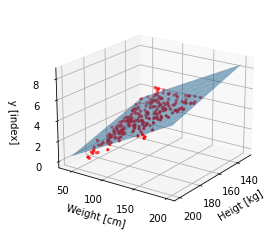

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], y_train, marker='.', color='red')
ax.set_xlabel("Heigt [kg]")
ax.set_ylabel("Weight [cm]")
ax.set_zlabel("y [index]")
ax.view_init(elev=20., azim=35)

model = LinearRegression()
model.fit(X_train, y_train)

n = 10
xs = np.tile(np.linspace(130, 200, num=n), (n,1))
ys = np.tile(np.linspace(40, 200, num=n), (n,1)).T
zs = np.zeros_like(xs)
for i in range(n):
    for j in range(n):
        x = xs[i,j]
        y = ys[i,j]
        zs[i,j] = model.predict([[x,y]])
        
        
# zs = xs*model.coef_[0]+ys*model.coef_[1]+model.intercept_ # This would also work (for the linear model)

ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()


Lets also try to plot a k neighbors regressor, and compare their

C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\XHYX0\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, b

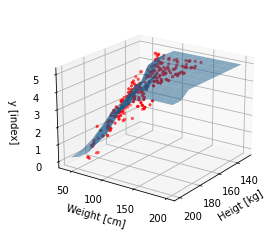

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], y_train, marker='.', color='red')
ax.set_xlabel("Heigt [kg]")
ax.set_ylabel("Weight [cm]")
ax.set_zlabel("y [index]")
ax.view_init(elev=20., azim=35)

model = KNeighborsRegressor()
model.fit(X_train, y_train)

n = 10
xs = np.tile(np.linspace(130, 200, num=n), (n,1))
ys = np.tile(np.linspace(40, 200, num=n), (n,1)).T
zs = np.zeros_like(xs)
for i in range(n):
    for j in range(n):
        x = xs[i,j]
        y = ys[i,j]
        zs[i,j] = model.predict([[x,y]])
                
ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()
